<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/PyTorch/4_CV_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch CV and CNN

In [35]:
%%time
# Import PyTorch
import torch as pt
from torch import nn

# Import Torch Vision
import torchvision as ptv
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor     # -> convers PIL / numpy to tensor

# Matplot for plotting and data viz
import matplotlib.pyplot as plt

pt.__version__, ptv.__version__

CPU times: user 134 µs, sys: 0 ns, total: 134 µs
Wall time: 149 µs


('2.5.1+cu121', '0.20.1+cu121')

## Loading the dataset
We are using the Fashion MNIST dataset. From Troch vision dataset

In [36]:
# Setting up the train dataset

train_data = datasets.FashionMNIST(
    root = 'data',      # Where to download the data to
    train = True,       # Do we want to train our dataset
    download = True,    # Do we want to download the dataset yes/no
    transform = ToTensor(),      # How we want to transfrom the data
    target_transform=  None      # how we want to tansform the labels
)

# Setting up the train dataset

test_data = datasets.FashionMNIST(
    root = 'data',      # Where to download the data to
    train = False,       # Do we want to train our dataset
    download = True,    # Do we want to download the dataset yes/no
    transform = ToTensor(),      # How we want to transfrom the data
    target_transform=  None      # how we want to tansform the labels
)

In [37]:
len(train_data), len(test_data)

(60000, 10000)

In [38]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [39]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [40]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### Checking the input

In [41]:
print(f"Image shape : {image.shape}")
print(f"Class : {class_names[label]}")

Image shape : torch.Size([1, 28, 28])
Class : Ankle boot


### Viszualize the data

In [42]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, '9')

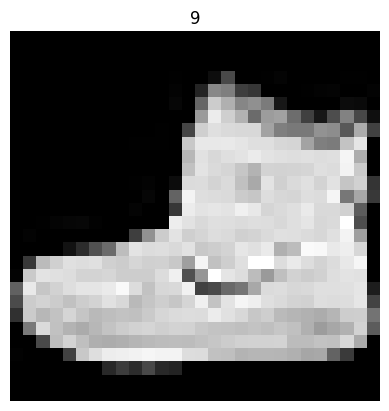

In [43]:
image, label = train_data[0]
# print(f"Image Shepe {i")

plt.imshow(image.squeeze(), cmap = 'gray')
plt.axis('off')
plt.title(label)

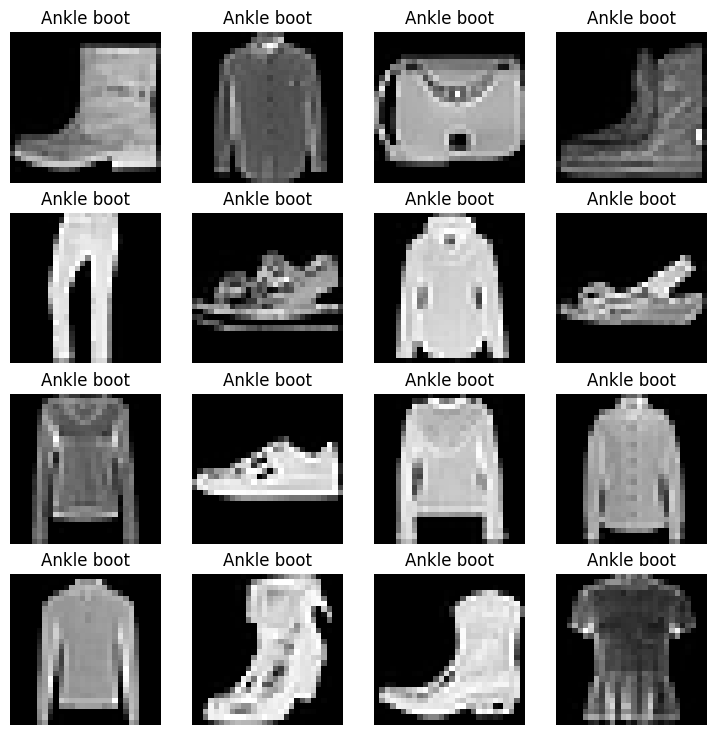

In [44]:
# Plotting more and ranodm images
pt.manual_seed(42)
fig = plt.figure(figsize = (9, 9))
row, col = 4, 4
for i in range(row * col ):
    rand_idx = pt.randint(0, len(train_data), size = [1]).item()
    image, lebel = train_data[rand_idx]
    fig.add_subplot(row, col, i+1)
    plt.imshow(image.squeeze(), cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False)

DataLoader

In [45]:
from torch.utils.data import DataLoader

In [46]:
# BATCH_SIZE = 50
BATCH_SIZE = 32

In [47]:
train_loader = DataLoader(
    dataset = train_data,
    batch_size= BATCH_SIZE,
    shuffle = True
)
test_loader = DataLoader(
    dataset = test_data,
    batch_size= BATCH_SIZE,
    shuffle = False
)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x78d841678cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x78d841678250>)

In [48]:
print(f"Length of train Data loader {len(train_loader)}, batches of {BATCH_SIZE}")
print(f"Length of test Data loader {len(test_loader)}, batches of {BATCH_SIZE}")

Length of train Data loader 1875, batches of 32
Length of test Data loader 313, batches of 32


In [49]:
train_batch, train_batch_label = next(iter(train_loader))
train_batch.shape, train_batch_label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Bag')

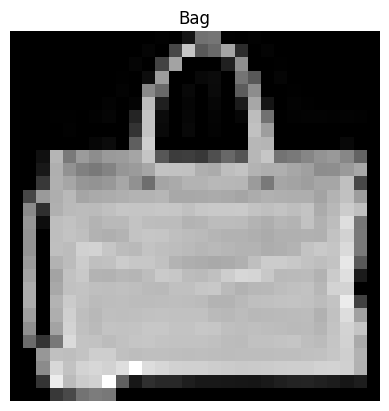

In [50]:
# Checking a sample

# pt.manual_seed(42)
rand_idx = pt.randint(0, len(train_batch), size=[1]).item()
image, label = train_batch[rand_idx], train_batch_label[rand_idx]
plt.imshow(image.squeeze(), cmap = 'gray')
plt.axis(False)
plt.title(class_names[label])

## Modeling
We will start with Baseline model

### BaseLine model

In [51]:
flatten_model = nn.Flatten()

x = train_batch[0]

# Flatten the sample
output = flatten_model(x)

x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [52]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units : int,
                 output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)



In [53]:
pt.manual_seed(42)

model0 = FashionMNISTModelV0(28*28, 100, len(class_names)).to('cpu')


In [54]:
dummy_x = pt.rand([1, 1, 28, 28])
model0(dummy_x)

tensor([[0.0000, 0.0771, 0.0000, 0.4561, 0.0000, 0.1057, 0.0146, 0.0000, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)

In [55]:
loss_fn = nn.CrossEntropyLoss()
optimizer = pt.optim.Adam(params = model0.parameters())

Measuring the time of the model training

In [56]:
from timeit import default_timer as tim
def print_train_time(start : float, end: float, device  = None):
    tt = end - start
    print(f"Time on device {device} : {tt : .3f}")

In [57]:
def acc_fn(y_true, y_pred):
    correct = pt.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_true))*100
    return acc

In [58]:
# Importing tqdm progress bar

from tqdm.auto import tqdm


In [59]:
from re import L
pt.manual_seed(42)
train_time_start = tim()

# Setting small epoch for faster training time.
epochs = 10

# Training and testing loop
for ep in range(epochs):
    print(f"Epoch: {ep} \n-------------")
    # Training
    train_loss = 0

    # Looping throught all the batches
    for batch, (x, y) in enumerate(train_loader):
        model0.train()

        # Forward pass
        y_pred = model0(x)

        # calc loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backward loss
        loss.backward()

        # Optimizer step
        optimizer.step()

        if batch % 400 == 0 :
            print(f"Looked at {batch*len(x)} / {len(train_loader)} smaples")

    train_loss /= len(train_loader)


    ### Testing
    test_loss, test_acc = 0, 0
    model0.eval()
    with pt.inference_mode():
        for x, y in test_loader:
            test_pred = model0(x)
            test_loss += loss_fn(test_pred, y)

            # Calculate accuracy
            test_acc += acc_fn(test_pred.argmax(dim = 1), y)

        test_loss /= len(test_loader)
        test_acc  /= len(test_loader)

    # Printing the results
    print(f"Train loss {train_loss : .4f} | Test loss {test_loss : .4f} | test acc {test_acc : .4f}")

train_time_end = tim()

print_train_time(train_time_start, train_time_end, 'cpu')

Epoch: 0 
-------------
Looked at 0 / 1875 smaples
Looked at 12800 / 1875 smaples
Looked at 25600 / 1875 smaples
Looked at 38400 / 1875 smaples
Looked at 51200 / 1875 smaples
Train loss  1.1750 | Test loss  1.1018 | test acc  61.0723
Epoch: 1 
-------------
Looked at 0 / 1875 smaples
Looked at 12800 / 1875 smaples
Looked at 25600 / 1875 smaples
Looked at 38400 / 1875 smaples
Looked at 51200 / 1875 smaples
Train loss  1.0534 | Test loss  1.0573 | test acc  65.4153
Epoch: 2 
-------------
Looked at 0 / 1875 smaples
Looked at 12800 / 1875 smaples
Looked at 25600 / 1875 smaples
Looked at 38400 / 1875 smaples
Looked at 51200 / 1875 smaples
Train loss  1.0173 | Test loss  1.0554 | test acc  63.1290
Epoch: 3 
-------------
Looked at 0 / 1875 smaples
Looked at 12800 / 1875 smaples
Looked at 25600 / 1875 smaples
Looked at 38400 / 1875 smaples
Looked at 51200 / 1875 smaples
Train loss  0.9941 | Test loss  1.0231 | test acc  65.4752
Epoch: 4 
-------------
Looked at 0 / 1875 smaples
Looked at 128

### Making Predection

In [60]:
def eval_model(model : nn.Module,
               data_loader : DataLoader,
               loss_fn : nn.Module,
               acc_fn):

    loss, acc = 0, 0
    model.eval()
    with pt.inference_mode():
        for x, y in data_loader:
            y = y.long()  # Ensure target labels are of type LongTensor
            y_pred = model(x)

            # Ensure the prediction is of float type for cross_entropy
            y_pred = y_pred.float()  # Convert logits to float if necessary

            loss += loss_fn(y_pred, y)
            acc += acc_fn(y, y_pred.argmax(dim=1))

        # Scale loss and acc to find the avg loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model name" : model.__class__.__name__,  # Only works when the model was created with class
            "model loss" : loss.item(),
            "model acc"  : acc}

# Calculate model 0 results on test dataset
model0_res = eval_model(model = model0,
                        data_loader = test_loader,
                        loss_fn = loss_fn,
                        acc_fn= acc_fn)

model0_res


{'model name': 'FashionMNISTModelV0',
 'model loss': 0.9944373965263367,
 'model acc': 67.67172523961662}

Device Agnostic Code - For using GPU

Skipping this portion

In [61]:
pt.cuda.is_available()

False

## Making CNN Model
-> Also known as convnet are useful for Visual data

In [62]:
class CNN_model(nn.Module):
    '''
    Making a CNN model similar to TinyVGG
    '''
    def __init__(self, inp_shape : int, hid_unit : int, op_shape : int):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=inp_shape, out_channels = hid_unit, kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hid_unit, out_channels=hid_unit, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels= hid_unit, out_channels=hid_unit, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hid_unit, out_channels=hid_unit, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hid_unit * 7 * 7,
                      out_features= op_shape)
        )


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.classifier(x)

        return x

In [63]:
pt.manual_seed(42)
model = CNN_model(1, 10, len(class_names))

Setting up the Loss function and optimizer

In [64]:
loss_fn = nn.CrossEntropyLoss()
optimizer = pt.optim.Adam(model.parameters(), lr = 0.1)

In [65]:
model.state_dict()

OrderedDict([('conv1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
             

### Training and Testing model

In [66]:
pt.manual_seed(42)
pt.cuda.manual_seed(42)
device = 'cpu'

In [67]:
def train_step(model: pt.nn.Module,
               data_loader: pt.utils.data.DataLoader,
               loss_fn: pt.nn.Module,
               optimizer: pt.optim.Optimizer,
               accuracy_fn,
               device: pt.device = 'cpu'):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def test_step(model: pt.nn.Module,
              data_loader: pt.utils.data.DataLoader,
              loss_fn: pt.nn.Module,
              accuracy_fn,
              device: pt.device = 'cpu'):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with pt.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [69]:
%%timeit

train_start_time = tim()

# Training
epochs = 10

for ep in tqdm(range(epochs)):
    print(f"Epoch {ep} \n---------------")
    train_step(model = model,
               data_loader = train_loader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = acc_fn,
               device = 'cpu')

    test_step(model = model,
              data_loader = test_loader,
              loss_fn = loss_fn,
              accuracy_fn= acc_fn)

train_end_time = tim()

tt = print_train_time(train_start_time, train_end_time, 'cpu')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 
---------------
Train loss: 2.31470 | Train acc: 10.12%
Test loss: 2.32145 | Test acc: 9.99%

Epoch 1 
---------------
Train loss: 2.31562 | Train acc: 10.03%
Test loss: 2.32513 | Test acc: 10.01%

Epoch 2 
---------------
Train loss: 2.31546 | Train acc: 10.20%
Test loss: 2.31257 | Test acc: 9.99%

Epoch 3 
---------------
Train loss: 2.31529 | Train acc: 9.90%
Test loss: 2.31415 | Test acc: 10.00%

Epoch 4 
---------------
Train loss: 2.31506 | Train acc: 10.01%
Test loss: 2.32217 | Test acc: 9.99%

Epoch 5 
---------------
Train loss: 2.31596 | Train acc: 10.05%
Test loss: 2.31520 | Test acc: 10.01%

Epoch 6 
---------------
Train loss: 2.31525 | Train acc: 9.91%
Test loss: 2.31487 | Test acc: 9.99%

Epoch 7 
---------------
Train loss: 2.31505 | Train acc: 9.99%
Test loss: 2.31717 | Test acc: 10.01%

Epoch 8 
---------------
Train loss: 2.31656 | Train acc: 10.01%
Test loss: 2.31750 | Test acc: 9.99%

Epoch 9 
---------------
Train loss: 2.31534 | Train acc: 9.90%
Test los

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 
---------------
Train loss: 2.31507 | Train acc: 9.96%
Test loss: 2.31115 | Test acc: 9.99%

Epoch 1 
---------------
Train loss: 2.31505 | Train acc: 10.03%
Test loss: 2.31543 | Test acc: 9.99%

Epoch 2 
---------------
Train loss: 2.31497 | Train acc: 9.88%
Test loss: 2.31721 | Test acc: 9.99%

Epoch 3 
---------------
Train loss: 2.31523 | Train acc: 10.03%
Test loss: 2.32333 | Test acc: 9.99%

Epoch 4 
---------------
Train loss: 2.31616 | Train acc: 9.95%
Test loss: 2.31800 | Test acc: 10.00%

Epoch 5 
---------------
Train loss: 2.31558 | Train acc: 9.79%
Test loss: 2.33497 | Test acc: 9.99%

Epoch 6 
---------------
Train loss: 2.31571 | Train acc: 9.84%
Test loss: 2.31032 | Test acc: 9.99%

Epoch 7 
---------------
Train loss: 2.31583 | Train acc: 9.91%
Test loss: 2.31797 | Test acc: 9.99%

Epoch 8 
---------------
Train loss: 2.31552 | Train acc: 10.06%
Test loss: 2.32616 | Test acc: 10.01%

Epoch 9 
---------------
Train loss: 2.31544 | Train acc: 9.81%
Test loss: 2.

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 
---------------
Train loss: 2.31535 | Train acc: 10.14%
Test loss: 2.31751 | Test acc: 9.99%

Epoch 1 
---------------
Train loss: 2.31490 | Train acc: 10.01%
Test loss: 2.31170 | Test acc: 10.01%

Epoch 2 
---------------
Train loss: 2.31571 | Train acc: 9.99%
Test loss: 2.31172 | Test acc: 10.00%

Epoch 3 
---------------
Train loss: 2.31533 | Train acc: 9.95%
Test loss: 2.31240 | Test acc: 10.01%

Epoch 4 
---------------
Train loss: 2.31575 | Train acc: 9.84%
Test loss: 2.31579 | Test acc: 9.99%

Epoch 5 
---------------
Train loss: 2.31484 | Train acc: 9.98%
Test loss: 2.31685 | Test acc: 9.99%

Epoch 6 
---------------
Train loss: 2.31555 | Train acc: 9.97%
Test loss: 2.31505 | Test acc: 10.00%

Epoch 7 
---------------
Train loss: 2.31620 | Train acc: 9.87%
Test loss: 2.33521 | Test acc: 10.01%

Epoch 8 
---------------
Train loss: 2.31640 | Train acc: 9.86%
Test loss: 2.31016 | Test acc: 10.00%

Epoch 9 
---------------
Train loss: 2.31515 | Train acc: 10.06%
Test loss

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 
---------------
Train loss: 2.31621 | Train acc: 10.00%
Test loss: 2.32079 | Test acc: 9.99%

Epoch 1 
---------------
Train loss: 2.31540 | Train acc: 9.96%
Test loss: 2.30494 | Test acc: 10.01%

Epoch 2 
---------------
Train loss: 2.31508 | Train acc: 9.90%
Test loss: 2.30995 | Test acc: 10.00%

Epoch 3 
---------------
Train loss: 2.31528 | Train acc: 10.22%
Test loss: 2.32053 | Test acc: 10.00%

Epoch 4 
---------------
Train loss: 2.31483 | Train acc: 9.91%
Test loss: 2.31535 | Test acc: 9.99%

Epoch 5 
---------------
Train loss: 2.31554 | Train acc: 9.92%
Test loss: 2.32452 | Test acc: 9.99%

Epoch 6 
---------------
Train loss: 2.31583 | Train acc: 9.97%
Test loss: 2.31029 | Test acc: 9.99%

Epoch 7 
---------------
Train loss: 2.31455 | Train acc: 10.05%
Test loss: 2.32436 | Test acc: 9.99%

Epoch 8 
---------------
Train loss: 2.31549 | Train acc: 9.81%
Test loss: 2.31103 | Test acc: 10.01%

Epoch 9 
---------------
Train loss: 2.31511 | Train acc: 10.18%
Test loss:

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 
---------------


KeyboardInterrupt: 

In [73]:
model_res = eval_model(
    model = model,
    data_loader = test_loader,
    loss_fn = loss_fn,
    acc_fn = acc_fn,
    # device = 'cpu'
)

model_res

{'model name': 'CNN_model',
 'model loss': 2.3151090145111084,
 'model acc': 9.984025559105431}

In [ ]:
model0_res

Evaluating the model

In [74]:
def make_pred (model : nn.Module, data: list, device : pt.device = 'cpu'):
    pred_probs = []
    model.to(device)
    model.eval()
    with pt.inference_mode():
        for sample in data:
            # Prepare the sample (add batch diamension )
            sample = pt.unsqueeze(sample, dim = 0).to(device)

            # Forward pass
            pred_logits = model(sample)

            # Logits -> Predection probab
            pred_prob = pt.softmax(pred_logits.squeeze(), dim = 0)

            pred_probs.append(pred_prob.cpu())

    #
    return pt.stack(pred_probs)

Random Sampling the samples

In [75]:
import random
random.seed(42)
test_samples, test_labels = [], []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

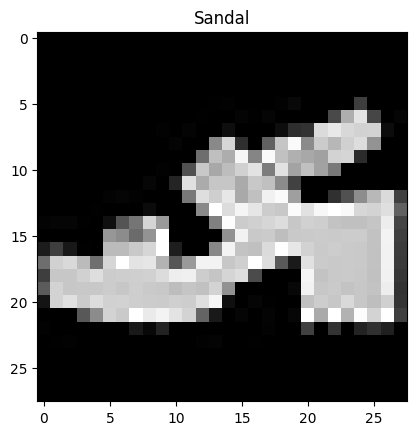

In [76]:
plt.imshow(test_samples[0].squeeze(), cmap = 'gray')
plt.title(class_names[test_labels[0]])

In [77]:
# Making Predection
pred_probs = make_pred(model = model, data = test_samples)

pred_probs[:2]

tensor([[0.1337, 0.1167, 0.0961, 0.0856, 0.0828, 0.1057, 0.0978, 0.1006, 0.0762,
         0.1048],
        [0.1337, 0.1167, 0.0961, 0.0856, 0.0828, 0.1057, 0.0978, 0.1006, 0.0762,
         0.1048]])

In [78]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

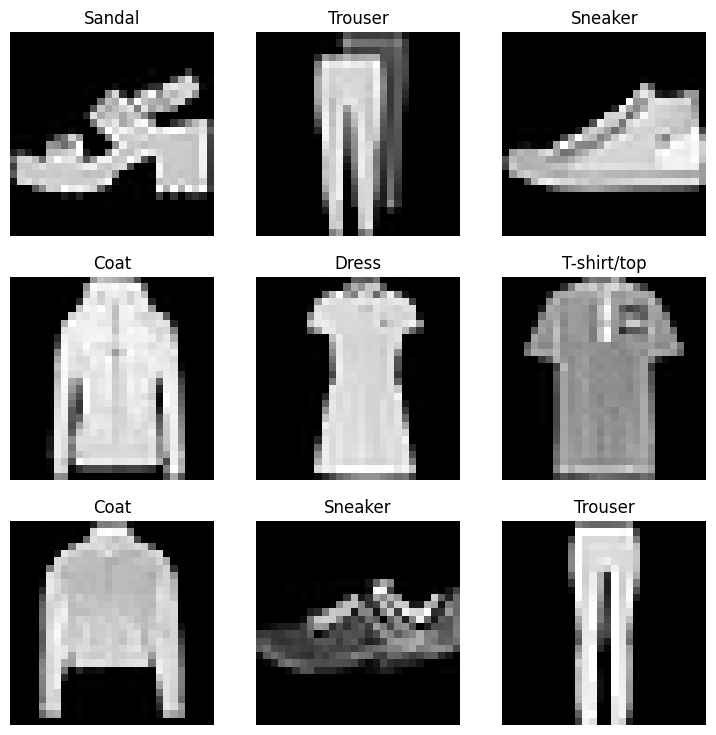

In [82]:
# Plot pred
plt.figure(figsize = (9, 9))
row = 3
col = 3

for i, sample in enumerate(test_samples):
    # Need to create subplot
    plt.subplot(row, col, i+1)
    plt.imshow(sample.squeeze(), cmap = 'gray')
    plt.title(class_names[test_labels[i]])
    plt.axis(False)